In [ ]:
# PM2.5

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #plotting
import seaborn as sns #for beatiful visualization

In [2]:
# reading csv
PM2= pd.read_csv(r'C:\\Users\\61423\\OneDrive\\Desktop\\SEM 3\\DVN\\AT3\\smoke-air quality\\PM2.5(NSW).csv')
PM2

,Date,RANDWICK PM2.5,ROZELLE PM2.5,LIVERPOOL PM2.5,BRINGELLY PM2.5,CHULLORA PM2.5,EARLWOOD PM2.5,WYONG PM2.5,WALLSEND PM2.5,CARRINGTON PM2.5,...,ARMIDALE PM2.5,ORANGE PM2.5,PORT MACQUARIE PM2.5,BRADFIELD HIGHWAY PM2.5,KATOOMBA PM2.5,ROUSE HILL PM2.5,COOK AND PHILLIP PM2.5,GOULBURN PM2.5,COFFS HARBOUR PM2.5,LISMORE PM2.5
0,31/12/2001,NaN,NaN,20.0,NaN,NaN,16.1,NaN,12.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31/01/2002,NaN,NaN,15.1,NaN,NaN,11.7,NaN,9.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28/02/2002,NaN,NaN,6.9,NaN,NaN,6.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31/03/2002,NaN,NaN,8.1,NaN,NaN,7.2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30/04/2002,NaN,NaN,8.0,NaN,NaN,7.2,NaN,5.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,31/08/2019,7.9,8.0,9.5,7.8,8.4,8.0,7.1,8.3,8.4,...,17.4,11.8,NaN,NaN,3.3,7.6,NaN,NaN,NaN,NaN
213,30/09/2019,8.5,9.2,7.5,6.0,7.5,6.4,6.5,6.8,8.0,...,14.1,9.5,NaN,9.3,3.6,5.3,6.3,NaN,NaN,NaN
214,31/10/2019,13.3,10.1,11.8,10.1,10.2,10.1,11.2,12.5,13.8,...,16.1,8.8,11.6,11.9,6.1,9.4,12.2,NaN,NaN,NaN
215,30/11/2019,19.2,17.5,18.5,18.0,19.0,16.4,19.6,20.3,21.2,...,46.9,18.4,71.6,21.6,17.0,24.8,21.4,11.8,NaN,NaN


In [3]:
from datetime import datetime, date
PM2["Date"]= pd.to_datetime(PM2["Date"]).dt.normalize()
#PM2["Date"]

# add month_year and year column
PM2['mnth_yr'] = PM2['Date'].apply(lambda x: x.strftime('%B-%Y')) 
PM2['year'] = PM2['Date'].apply(lambda x: x.strftime('%Y')) 
PM2

In [4]:
# Taking average of PM_2.5 index for all regions in NSW 
PM2['PM2_avg'] = PM2.iloc[:,1:].mean(axis=1)
PM2.head()

,Date,RANDWICK PM2.5,ROZELLE PM2.5,LIVERPOOL PM2.5,BRINGELLY PM2.5,CHULLORA PM2.5,EARLWOOD PM2.5,WYONG PM2.5,WALLSEND PM2.5,CARRINGTON PM2.5,...,ORANGE PM2.5,PORT MACQUARIE PM2.5,BRADFIELD HIGHWAY PM2.5,KATOOMBA PM2.5,ROUSE HILL PM2.5,COOK AND PHILLIP PM2.5,GOULBURN PM2.5,COFFS HARBOUR PM2.5,LISMORE PM2.5,PM2_avg
0,2001-12-31,NaN,NaN,20.0,NaN,NaN,16.1,NaN,12.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.814286
1,2002-01-31,NaN,NaN,15.1,NaN,NaN,11.7,NaN,9.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.416667
2,2002-02-28,NaN,NaN,6.9,NaN,NaN,6.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.460000
3,2002-03-31,NaN,NaN,8.1,NaN,NaN,7.2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.260000
4,2002-04-30,NaN,NaN,8.0,NaN,NaN,7.2,NaN,5.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.357143


In [5]:
# set Date to datetimeindex
PM2.set_index('Date', inplace=True)
PM2.index = pd.to_datetime(PM2.index)

In [6]:
PM2_avg = PM2.resample('M').agg({'PM2_avg':'max'}) 
PM2_avg.head()

,PM2_avg
Date,
2001-12-31,15.814286
2002-01-31,12.416667
2002-02-28,6.460000
2002-03-31,7.260000
2002-04-30,6.357143


In [7]:
# Naming the index column
PM2_avg.index.name= "Date"

# Converting the index into a column
PM2_MONTHLY_avg= PM2_avg.reset_index()
print("modified: ")
print(PM2_MONTHLY_avg)

modified: 
          Date    PM2_avg
0   2001-12-31  15.814286
1   2002-01-31  12.416667
2   2002-02-28   6.460000
3   2002-03-31   7.260000
4   2002-04-30   6.357143
..         ...        ...
212 2019-08-31   8.120513
213 2019-09-30   7.031707
214 2019-10-31  11.019512
215 2019-11-30  20.593023
216 2019-12-31  34.088889

[217 rows x 2 columns]


In [8]:
# Save the year+months ozone data into a csv
PM2_MONTHLY_avg.to_csv("PM2.5_MONTHLY.csv")

In [10]:
from matplotlib import pyplot
#plt.style.use('ggplot')
plt.style.use('seaborn-white')

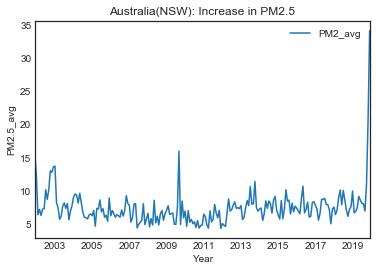

In [11]:
PM2_MONTHLY_avg.plot(x= "Date", y="PM2_avg")

fig= plt.gcf()
#fig.savefig("ozone_monthly.png")
pyplot.xlabel("Year")
pyplot.ylabel('PM2.5_avg')
pyplot.title("Australia(NSW): Increase in PM2.5")
fig.savefig("PM2_5_MONTHLY.png")
pyplot.show()


In [22]:
# Define range of dates for the barchart
mask = (PM2_MONTHLY_avg['Date'] > '2017-12-31')

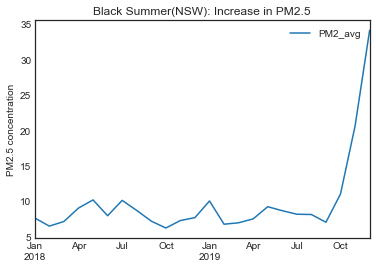

In [24]:
PM2_MONTHLY_avg.loc[mask].plot(x= "Date", y="PM2_avg")

fig= plt.gcf()
#fig.savefig("ozone_monthly.png")
pyplot.xlabel("")
pyplot.ylabel('PM2.5 concentration')
pyplot.title("Black Summer(NSW): Increase in PM2.5")
fig.savefig("PM2_5_2019.png")
pyplot.show()


# yEALY DATA

In [13]:
PM2_yearly = PM2.resample('Y').agg({'PM2_avg':'max'})
PM2_yearly.head()

,PM2_avg
Date,
2001-12-31,15.814286
2002-12-31,13.660000
2003-12-31,13.766667
2004-12-31,9.687500
2005-12-31,9.000000


In [14]:
# Naming the index column
PM2_yearly.index.name= "Date"

# Converting the index into a column
PM2_yearly= PM2_yearly.reset_index()
print("modified: ")
print(PM2_yearly)

modified: 
         Date    PM2_avg
0  2001-12-31  15.814286
1  2002-12-31  13.660000
2  2003-12-31  13.766667
3  2004-12-31   9.687500
4  2005-12-31   9.000000
5  2006-12-31   9.328571
6  2007-12-31   8.133333
7  2008-12-31   8.642857
8  2009-12-31  16.000000
9  2010-12-31   7.085714
10 2011-12-31   8.018182
11 2012-12-31   8.827273
12 2013-12-31  11.469231
13 2014-12-31   9.217647
14 2015-12-31  10.215000
15 2016-12-31  10.756000
16 2017-12-31   8.936667
17 2018-12-31  10.179412
18 2019-12-31  34.088889


In [15]:
# ADD year colum to it
PM2_yearly['year'] = PM2_yearly['Date'].apply(lambda x: x.strftime('%Y'))
print(PM2_yearly)

         Date    PM2_avg  year
0  2001-12-31  15.814286  2001
1  2002-12-31  13.660000  2002
2  2003-12-31  13.766667  2003
3  2004-12-31   9.687500  2004
4  2005-12-31   9.000000  2005
5  2006-12-31   9.328571  2006
6  2007-12-31   8.133333  2007
7  2008-12-31   8.642857  2008
8  2009-12-31  16.000000  2009
9  2010-12-31   7.085714  2010
10 2011-12-31   8.018182  2011
11 2012-12-31   8.827273  2012
12 2013-12-31  11.469231  2013
13 2014-12-31   9.217647  2014
14 2015-12-31  10.215000  2015
15 2016-12-31  10.756000  2016
16 2017-12-31   8.936667  2017
17 2018-12-31  10.179412  2018
18 2019-12-31  34.088889  2019


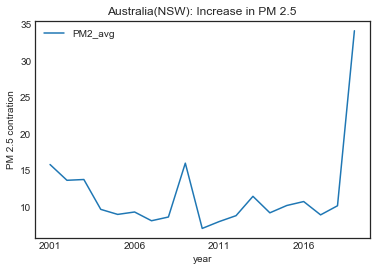

In [16]:
PM2_yearly.plot(x= "year", y="PM2_avg")

fig= plt.gcf()
#fig.savefig("ozone_yearly.png")
#pyplot.xlabel("Year")
pyplot.ylabel('PM 2.5 contration')
pyplot.title("Australia(NSW): Increase in PM 2.5")
fig.savefig("PM 2.5.png")
pyplot.show()


In [17]:
# Save the year+months ozone data into a csv
PM2_yearly.to_csv("PM_2_2001-2019.csv")